In [2]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [3]:
X, y = mnist["data"], mnist["target"]
X.shape # 28 x 28의 pixel, 각 pixel은 0~255의 픽셀 강도를 가짐

(70000, 784)

In [4]:
y.shape

(70000,)

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)

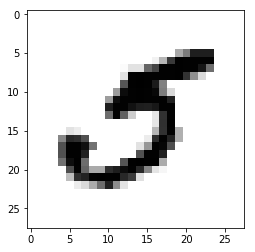

In [6]:
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
          interpolation="nearest")
plt.axis=("off")
plt.show()

In [7]:
y[36000]

5.0

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [1]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train= X_train[shuffle_index], y_train[shuffle_index]

NameError: name 'X_train' is not defined

In [10]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [11]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter = 5, random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [12]:
sgd_clf.predict([some_digit])

array([ True])

## 정확도로 분류기의 성능 평가하기

In [13]:
#cross_val_Score와 비슷한 기능을 하는 함수
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.96595
0.9628
0.95805


In [14]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.96595, 0.9628 , 0.95805])

In [15]:
from sklearn.base import BaseEstimator

class Never5Classfier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [16]:
never_5_clf = Never5Classfier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")
# 데이터셋이 불균형할때 정확도는 선호되지 않음

array([0.9099 , 0.9084 , 0.91065])

##  오차행렬로 분류기의 성능 평가하기

In [17]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53313,  1266],
       [  998,  4423]], dtype=int64)

In [19]:
confusion_matrix(y_train_5, y_train_5)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

### 양성 예측의 정확도 = 정밀도
- 정밀도 = TP/(TP+FP), TP=진짜양성, FP=거짓양성
- 재현율(민감도) = TP/(TP+FN), FN=거짓음성
- TN FP
- FN TP

In [20]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.7774652838811742

In [21]:
recall_score(y_train_5, y_train_pred)

0.8159011252536432

####  F1 score = 2/(1/정밀도 + 1/재현율) = 2 x (정밀도x재현율)/(정밀도+재현율)
##### 정밀도와 재현율의 조화평균

In [22]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7962196219621962

In [23]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([236735.96119042])

In [24]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [25]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [26]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                            method="decision_function")

In [27]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

### 한글폰트 사용

In [28]:
import matplotlib.font_manager as fm
from matplotlib import rc
matplotlib.rcParams['axes.unicode_minus'] = False

In [29]:
font_name = fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

### 다시 시작

In [30]:
matplotlib.rc(['xtick','ytick'], labelsize=10)

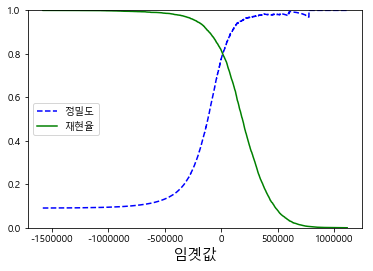

In [31]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="정밀도")
    plt.plot(thresholds, recalls[:-1], "g-", label="재현율")
    plt.xlabel("임곗값", fontsize=15)
    plt.legend(loc="center left")
    plt.ylim([0,1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [32]:
thresholds[precisions[:-1] > 0.9]

array([  93039.21704157,   93185.93617497,   93338.42964798, ...,
       1060364.42761474, 1102075.93580471, 1113732.11319862])

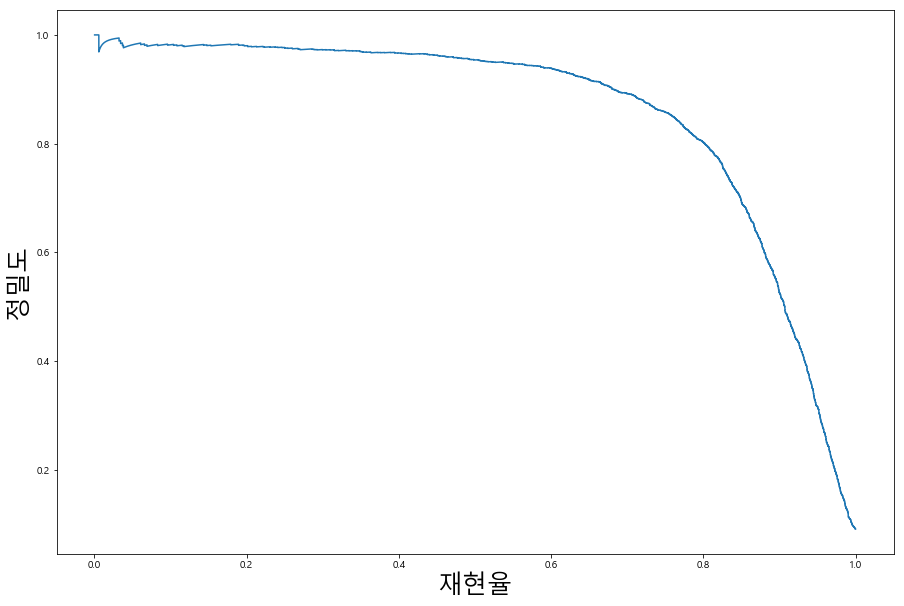

In [33]:
plt.figure(figsize=(15,10))
plt.plot(recalls[:-1], precisions[:-1])
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
plt.xlabel("재현율", fontsize=25)
plt.ylabel("정밀도", fontsize=25)
plt.show()

In [34]:
y_train_pred_90 = (y_scores > -50000)

In [35]:
precision_score(y_train_5, y_train_pred_90)

0.6667619728377412

In [36]:
recall_score(y_train_5, y_train_pred_90)

0.8603578675521122

# ROC 곡선
- 정밀도/재현율 곡선과 비슷한 생김새
- TPR/FPR의 곡선, TPR = True Positive Ratio, FPR = False Positive Ratio ,, /는 나누기의 의미 X
- FPR은 양성으로 잘못 분류된 음성 샘플의 비율
- FPR = 1 - TNR, TNR=진짜 음성 비율=특이도
- ROC곡선은 (1-특이도)/민감도

In [37]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

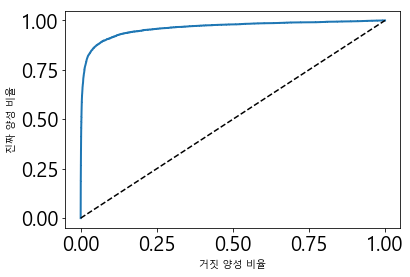

In [38]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],"k--")
    plt.xlabel("거짓 양성 비율")
    plt.ylabel("진짜 양성 비율")
    
plot_roc_curve(fpr,tpr)
plt.show()

In [39]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.962695132741166

In [40]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")
y_probas_forest1 = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)

In [41]:
y_probas_forest[y_probas_forest[:,1] > 0.5]

array([[0. , 1. ],
       [0. , 1. ],
       [0.2, 0.8],
       ...,
       [0.3, 0.7],
       [0. , 1. ],
       [0. , 1. ]])

In [42]:
y_probas_forest1[y_probas_forest[:,1] > 0.5]

array([ True,  True,  True, ...,  True,  True,  True])

In [43]:
y_scores_forest = y_probas_forest[:,1] # 양성 클래스에 대한 확률
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

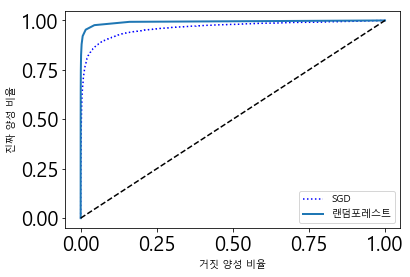

In [44]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "랜덤포레스트")
plt.legend(loc="lower right")
plt.show()

In [45]:
roc_auc_score(y_train_5, y_scores_forest)

0.9926609718740615

0.9835164835164835

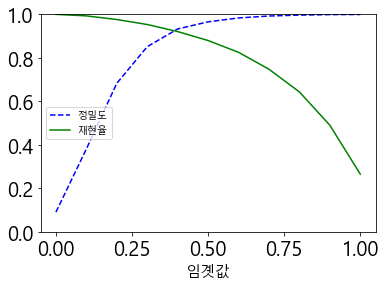

In [46]:
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)

plot_precision_recall_vs_threshold(precisions_forest, recalls_forest, thresholds_forest)

recall_score(y_train_5, y_scores_forest > 0.5)
precision_score(y_train_5, y_scores_forest > 0.5)

In [47]:
sgd_clf.fit(X_train, y_train)  # y_train_5가 아님
sgd_clf.predict([some_digit])

array([5.])

In [48]:
import pandas as pd
pd.crosstab(sgd_clf.predict(X_train), y_train, rownames=['pred'], colnames=['real'])

real,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
pred,,,,,,,,,,
0.0,5764,1,111,54,53,64,35,43,50,95
1.0,0,5769,29,24,8,3,6,5,20,22
2.0,14,22,4636,84,23,20,20,29,30,21
3.0,7,24,155,4735,4,66,5,14,30,27
4.0,3,16,57,24,5398,30,33,88,21,784
5.0,50,34,61,522,29,4581,139,24,207,191
6.0,35,14,104,23,48,85,5541,7,28,3
7.0,2,26,72,58,12,11,3,5865,23,842
8.0,45,836,726,581,230,488,136,115,5423,666


In [49]:
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, random_state=42))
ovo_clf.fit(X_train, y_train)
len(ovo_clf.estimators_)

45

In [50]:
ovo_clf.predict([some_digit])

array([5.])

In [51]:
ovo_clf.decision_function([some_digit])

array([[ 7.2494684 ,  3.90720779,  3.92348705,  8.40815685,  3.86071117,
         9.5       , -0.41734348,  4.0241506 ,  2.74319686,  1.80096476]])

In [52]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([5.])

In [53]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87582484, 0.81559078, 0.86207931])

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=5, scoring="accuracy")

array([0.91378592, 0.91026496, 0.90983333, 0.90989414, 0.90896966])

In [55]:
pd.DataFrame(X_train_scaled)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.033171,-0.022463,-0.016069,-0.011432,-0.009007,-0.00577,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.033171,-0.022463,-0.016069,-0.011432,-0.009007,-0.00577,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.033171,-0.022463,-0.016069,-0.011432,-0.009007,-0.00577,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.033171,-0.022463,-0.016069,-0.011432,-0.009007,-0.00577,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.033171,-0.022463,-0.016069,-0.011432,-0.009007,-0.00577,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.033171,-0.022463,-0.016069,-0.011432,-0.009007,-0.00577,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.033171,-0.022463,-0.016069,-0.011432,-0.009007,-0.00577,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.033171,-0.022463,-0.016069,-0.011432,-0.009007,-0.00577,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.033171,-0.022463,-0.016069,-0.011432,-0.009007,-0.00577,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.033171,-0.022463,-0.016069,-0.011432,-0.009007,-0.00577,0.0,0.0,0.0,0.0


In [56]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5739,    2,   24,   11,   10,   48,   40,    9,   38,    2],
       [   2, 6468,   45,   24,    6,   38,    8,   14,  126,   11],
       [  53,   38, 5344,   92,   78,   24,   92,   54,  167,   16],
       [  49,   41,  135, 5309,    2,  257,   36,   58,  143,  101],
       [  18,   23,   35,   11, 5376,   10,   55,   32,   89,  193],
       [  65,   40,   35,  183,   70, 4613,  119,   27,  178,   91],
       [  36,   22,   48,    2,   36,   83, 5634,    5,   52,    0],
       [  24,   19,   72,   24,   54,   13,    5, 5834,   15,  205],
       [  54,  140,   72,  144,   16,  155,   53,   29, 5059,  129],
       [  44,   32,   28,   84,  178,   34,    3,  251,   87, 5208]],
      dtype=int64)

In [58]:
conf_mx_df = pd.crosstab(y_train, y_train_pred)
conf_mx_df

col_0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
row_0,,,,,,,,,,
0.0,5739,2,24,11,10,48,40,9,38,2
1.0,2,6468,45,24,6,38,8,14,126,11
2.0,53,38,5344,92,78,24,92,54,167,16
3.0,49,41,135,5309,2,257,36,58,143,101
4.0,18,23,35,11,5376,10,55,32,89,193
5.0,65,40,35,183,70,4613,119,27,178,91
6.0,36,22,48,2,36,83,5634,5,52,0
7.0,24,19,72,24,54,13,5,5834,15,205
8.0,54,140,72,144,16,155,53,29,5059,129


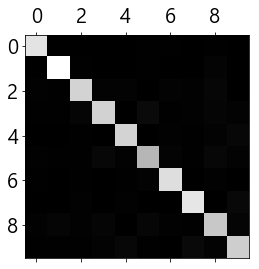

In [59]:
plt.matshow(conf_mx_df, cmap = plt.cm.gray)
plt.show()

In [60]:
a = np.matrix([[1,2],[3,4]])

In [61]:
# ?np.matrix

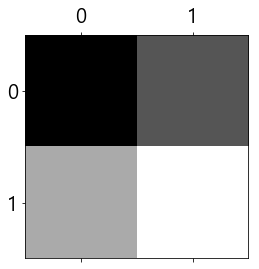

In [62]:
plt.matshow(a, cmap=plt.cm.gray)

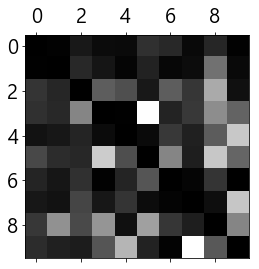

In [63]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

In [64]:
row_sums

array([[5923],
       [6742],
       [5958],
       [6131],
       [5842],
       [5421],
       [5918],
       [6265],
       [5851],
       [5949]], dtype=int64)

# 147페이지 밑쪽 코드부터 다시
- 마지막 줄 깃허브 주피터 노트북도 확인해야함
- 2장도 다시 한 번 보는게 좋을 듯
- gridCV위주로
- opencv도 재밌을듯

In [74]:
# 숫자 그림을 위한 추가 함수
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
#     plt.axis(object = 'off')

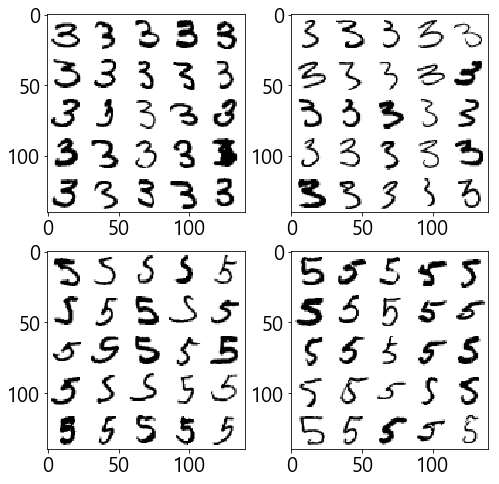

In [75]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)

In [71]:
?plt.axis

In [76]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [77]:
y_multilabel

array([[ True, False],
       [False,  True],
       [False, False],
       ...,
       [False,  True],
       [False, False],
       [ True,  True]])

In [78]:
# ?np.c_

In [79]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3, n_jobs=-1)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

In [ ]:
f1_score(y_multilabel, y_train_knn_pred, average="weighted")

In [ ]:
noise = rnd.randint(0, 100, (len(X_train), 784))

In [5]:
import numpy as np
from numpy import random as rnd

rnd.randint(0,100, (5, 3))

array([[13, 57, 94],
       [ 2, 92, 70],
       [75, 81, 71],
       [70, 18, 93],
       [69, 21, 82]])